# Feature Transformation

In this notebook, we'll further look at the ditribution of the features in our data and perform some approprite transformations if needed to better suit our predictor models.

Similar to the ['initial_EDA]('initial_EDA.ipynb') notebook, we'll look at the groups of similar features in our analysis.

Features 'SEX', 'EDUCATION', 'MARRIAGE' do not need to be transformed, as they are categorical features in essence, so the first we'll look at is 'LIMIT_BAL'.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import scipy.stats
sns.set()
%matplotlib inline

In [2]:
def read_data(path):
    df = pd.read_excel(path, header=0)

    df.columns = df.iloc[0,:]

    df.rename(index=str, columns={"default payment next month": "Y"}, inplace=True)

    y = df.Y

    df.drop('ID', inplace=True, axis = 0)
    y.drop('ID', inplace=True, axis = 0)
    df.drop(columns = 'Y', inplace = True)
    df = df.astype('int32')
    
    #replace 'PAY_0' with 'PAY_1' in order to allign with 'BILL_AMT1' and 'PAY_AMT1'
    df.rename(index=str, columns = {'PAY_0': 'PAY_1'}, inplace=True)

    return df,  y

df, y= read_data('../default_of_credit_card_clients.xls')
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [3]:
#change the 'EDUCATION' values
df['EDUCATION'] = df['EDUCATION'].replace({1: 'Graduate School', 2: 'University', 3: 'Other', 4: 'Other', 5: 'Other', 6: 'Other', 0: 'Other'})

#change the 'SEX' values
df['SEX'] = df['SEX'].replace({1: 'Male', 2:'Female'})

#change the 'MARRIAGE' values
df['MARRIAGE'] = df['MARRIAGE'].replace({2: 'Non-married', 1: 'Married', 3: 'Non-married', 0: 'Non-married'})

df = pd.get_dummies(df)
df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_Female,SEX_Male,EDUCATION_Graduate School,EDUCATION_Other,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Non-married
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,0,0,1,1,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,0,1,0,1
3,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,1,0,0,0,1,0,1
4,50000,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,1,0,0,0,1,1,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,0,0,1,1,0


the shaprio score is 0.9073493480682373, the p-value is 0.0
'LIMIT_BAL' skew vale: 0.992866960519544


/opt/tljh/user/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<function print>

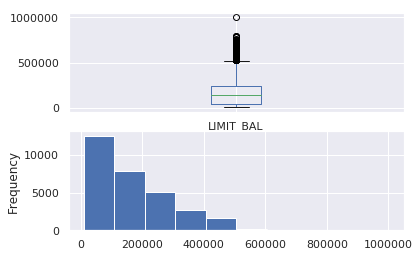

In [4]:
#LIMIT_BAL:

from scipy.stats import shapiro

shapiro_score = shapiro(df['LIMIT_BAL'])

print(f"the shaprio score is {shapiro_score[0]}, the p-value is {shapiro_score[1]}")

plt.subplot(2,1,1)
df['LIMIT_BAL'].plot(kind='box')

plt.subplot(2,1,2)
df['LIMIT_BAL'].plot(kind = 'hist')

skew = df['LIMIT_BAL'].skew()
print(f"'LIMIT_BAL' skew vale: {skew}")
print

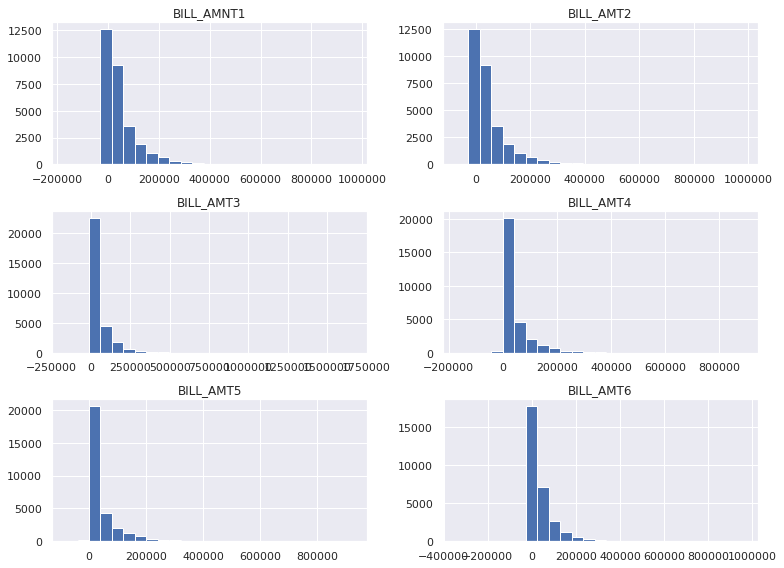

In [5]:
#create bill_amnts group
fig = plt.figure(figsize = (11,8))
bill_amts = df.loc[:, 'BILL_AMT1':'BILL_AMT6']


plt.subplot(3,2,1)
ax1 = bill_amts['BILL_AMT1'].hist(bins=25)
ax1.set_title('BILL_AMNT1')

plt.subplot(3,2,2)
ax2 = bill_amts['BILL_AMT2'].hist(bins=25)
ax2.set_title('BILL_AMT2')

plt.subplot(3,2,3)
ax3 = bill_amts['BILL_AMT3'].hist(bins=25)
ax3.set_title('BILL_AMT3')

plt.subplot(3,2,4)
ax4 = bill_amts['BILL_AMT4'].hist(bins=25)
ax4.set_title('BILL_AMT4')

plt.subplot(3,2,5)
ax5 = bill_amts['BILL_AMT5'].hist(bins=25)
ax5.set_title('BILL_AMT5')

plt.subplot(3,2,6)
ax6 = bill_amts['BILL_AMT6'].hist(bins=25)
ax6.set_title('BILL_AMT6')

plt.tight_layout()

In [6]:
df.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_Female', 'SEX_Male',
       'EDUCATION_Graduate School', 'EDUCATION_Other', 'EDUCATION_University',
       'MARRIAGE_Married', 'MARRIAGE_Non-married'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f851cd5b198>,
      dtype=object)

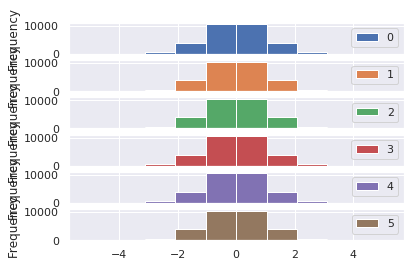

In [18]:
bill_columns = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6']

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer


quantile_transformer = QuantileTransformer(
    output_distribution='normal', random_state=2019)
X_trans = quantile_transformer.fit_transform(df[bill_columns])

pd.DataFrame(X_trans).plot(kind = 'hist', subplots = True)


#bill_columns_transformer = Pipeline(steps = [])